In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [3]:
c=tf.constant(1)    #常數
v = tf.Variable(1)  #變數

x = tf.constant(4)
print(x)  # 顯示Tensor 常數資訊，Shape=()表示標量，dtype=int32 表示整數

print(x.ndim)       #幾維

x = tf.constant([1, 2, 3, 4, 5, 6]) 
print(x)

x = tf.constant([[1, 2, 3], [4, 5, 6]])
print(x)


tf.Tensor(4, shape=(), dtype=int32)
0
tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [4]:
print("Eager Execution 是否啟動: {}".format(tf.executing_eagerly()))

Eager Execution 是否啟動: True


In [5]:
a = tf.constant(3)
b = tf.constant(4)
print(a)
print(b)
print("a = {}".format(a))
print("b = {}".format(b))

c = a + b
print("a + b = {}".format(c))
d = a * b
print("a * b = {}".format(d))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
a = 3
b = 4
a + b = 7
a * b = 12


矩陣相乘和線性代數矩陣相乘相同

In [6]:
a = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
b = np.array([[1., 0.], [2., 3.]], dtype=np.float32)
print("a constant: {}D Tensor".format(a.ndim))

c = a + b
print("a + b = \n{}".format(c))
d = tf.matmul(a, b) 
print("a * b = \n{}".format(d))

a constant: 2D Tensor
a + b = 
[[2. 2.]
 [5. 7.]]
a * b = 
[[ 5.  6.]
 [11. 12.]]


In [7]:
print(c)
print("NumpyArray:\n {}".format(c.numpy()))

print(type(c.numpy()))

tf.Tensor(
[[2. 2.]
 [5. 7.]], shape=(2, 2), dtype=float32)
NumpyArray:
 [[2. 2.]
 [5. 7.]]
<class 'numpy.ndarray'>


In [8]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
#loss=w^2
#d/dw(loss)=2w , w=1 => grad=2
grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


dense:搭建全連階層

conv2d:搭建捲積層

flatten:將輸出攤平成一維張量，用於捲積層與全連接層間

add:兩層輸出加在一起

concatenate:兩層輸出串聯，較於add計算量更大

### Sequential Model 序列模型
較簡單快速 

迴歸問題、分類問題

 逐層搭建網路
 
  必須單輸入單輸出




In [9]:
#輸入為28x28 (拉平為784的一維向量)的影像，輸出為10 (分為十個類別)
model = keras.Sequential(name='Sequential')
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=(784,)),
                             layers.Dense(64, activation='relu'), 
                             layers.Dense(10, activation='softmax')])

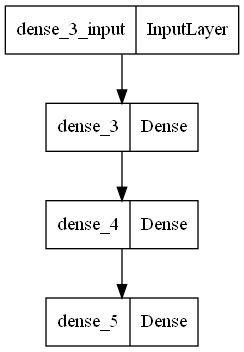

In [11]:
# 產生網絡拓撲圖
plot_model(model, to_file='Sequential_Model.png')

# 秀出網絡拓撲圖
Image('Sequential_Model.png')

### funtion api      函數式模型
可單/多輸入 單/多輸出


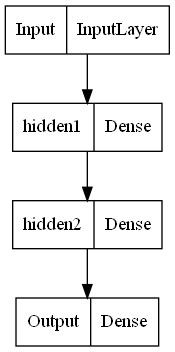

In [12]:
#single input single output
inputs = keras.Input(shape=(784,), name='Input')
hidden1 = layers.Dense(64, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(hidden1)
outputs = layers.Dense(10, activation='softmax', name='Output')(hidden2)

model = keras.Model(inputs=inputs, outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Sample_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Sample_Model.png')


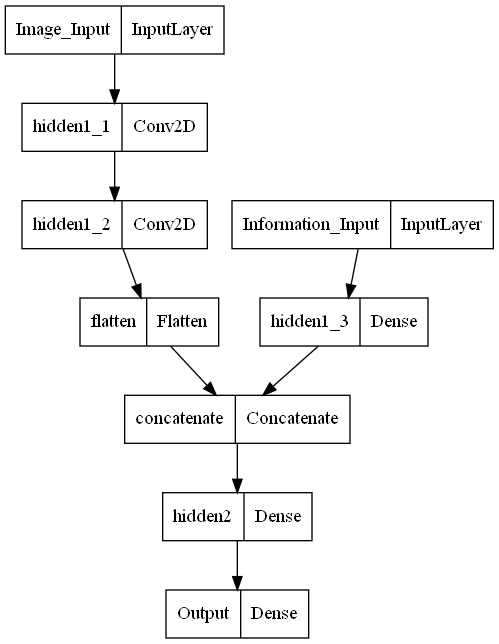

In [13]:
#multi input 
img_input = keras.Input(shape=(128, 128, 3), name='Image_Input')
info_input = keras.Input(shape=(1, ), name='Information_Input')

hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)
outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Input_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Input_Model.png')




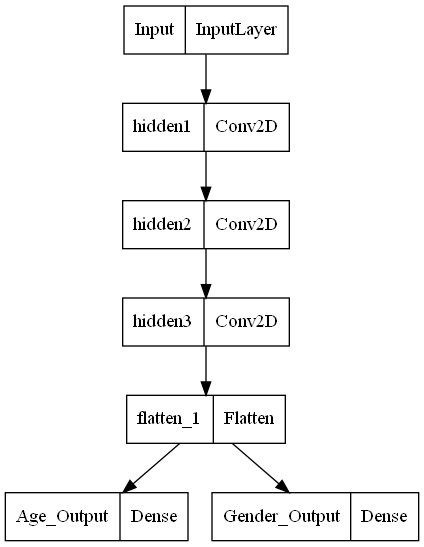

In [14]:
#multi output

inputs = keras.Input(shape=(128, 128, 3), name='Input')

hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

age_output = layers.Dense(1, name='Age_Output')(flatten)
gender_output = layers.Dense(1, name='Gender_Output')(flatten)

model = keras.Model(inputs=inputs, outputs=[age_output, gender_output])

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Output_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Output_Model.png')


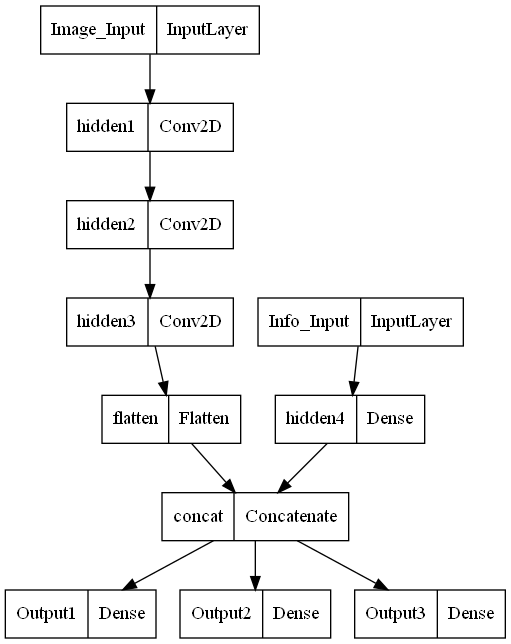

In [15]:
#multi input multi output

image_inputs = keras.Input(shape=(256, 256, 3), name='Image_Input')
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(image_inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten(name='flatten')(hidden3)

info_inputs = keras.Input(shape=(10, ), name='Info_Input')
hidden4 = layers.Dense(64,name='hidden4')(info_inputs)

concat = layers.Concatenate(name='concat')([flatten, hidden4])

weather_outputs = layers.Dense(1, name='Output1')(concat)
temp_outputs = layers.Dense(1, name='Output2')(concat)
humidity_outputs = layers.Dense(1, name='Output3')(concat)

model = keras.Model(inputs=[image_inputs, info_inputs], 
                    outputs=[weather_outputs, temp_outputs, humidity_outputs])

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Input_Multi_Output_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Input_Multi_Output_Model.png')

### tf.data

In [16]:
dataset = tf.data.Dataset.from_tensors(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], shape=(10, )))
print(dataset)

<TensorDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int32, name=None)>


slices一次讀一個數值


In [17]:

x_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], shape=(10, )))
print(x_data)

y_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], shape=(10, )))
print(y_data)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [18]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [19]:
for data1, data2 in zip(x_data, y_data):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


.take(n)指定讀取資料數量

In [20]:
for data1, data2 in zip(x_data.take(5), y_data.take(5)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8


In [21]:
for data1, data2 in zip(x_data.take(12), y_data.take(12)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


將多個dataset打包成一個

In [22]:
dataset = tf.data.Dataset.zip((x_data, y_data))
print(dataset)

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


可以用map轉換數據

In [28]:
display(list(tf.data.Dataset.range(10).map(lambda x: x*2)))


[<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=6>,
 <tf.Tensor: shape=(), dtype=int64, numpy=8>,
 <tf.Tensor: shape=(), dtype=int64, numpy=10>,
 <tf.Tensor: shape=(), dtype=int64, numpy=12>,
 <tf.Tensor: shape=(), dtype=int64, numpy=14>,
 <tf.Tensor: shape=(), dtype=int64, numpy=16>,
 <tf.Tensor: shape=(), dtype=int64, numpy=18>]

可以字典方式為elements的組件命名

In [29]:
x = tf.data.Dataset.range(10)
y = tf.data.Dataset.range(10).map(lambda x: x*2)

dataset = tf.data.Dataset.zip({"x": x, "y": y})
print(dataset)

<ZipDataset element_spec={'x': TensorSpec(shape=(), dtype=tf.int64, name=None), 'y': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [30]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


設定每batch讀取的數量

In [31]:
dataset = tf.data.Dataset.zip({"x": x, "y": y}).batch(2)

for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]


shuffle：資料會被載入buffer中，並從buffer中隨機選取資料出來，取出資料產生的空位會從新的數據替補。而buffer_size是設定buffer大小，最好的設定是大於或等於整個dataset資料個個數。

In [32]:
dataset = dataset.shuffle(10)
for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [2 3], y: [4 6]
x: [0 1], y: [0 2]
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]


repeat：當dataset的資料讀取完後就讀會取不到資料，透過設定repeat(n)可以重複讀取dataset n次。

In [33]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

    
print('-' * 50)
dataset = dataset.repeat(2)
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [6 7], y: [12 14]
x: [4 5], y: [ 8 10]
x: [2 3], y: [4 6]
x: [8 9], y: [16 18]
x: [0 1], y: [0 2]
--------------------------------------------------
x: [4 5], y: [ 8 10]
x: [8 9], y: [16 18]
x: [2 3], y: [4 6]
x: [0 1], y: [0 2]
x: [6 7], y: [12 14]
x: [6 7], y: [12 14]
x: [0 1], y: [0 2]
x: [4 5], y: [ 8 10]
x: [8 9], y: [16 18]
x: [2 3], y: [4 6]
